# Linear Regression

In [1]:
# Simple Linear Regression - 3.1 - 1 feature
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv")
df.head() # Money spent in thousands on a certani form of advertising every week and corresponding sales

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [3]:
# Relationship between how much we spend on ads and sales
#combine to total spend
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

TV  radio  newspaper  sales  total_spend
0  230.1   37.8       69.2   22.1        337.1
1   44.5   39.3       45.1   10.4        128.9
2   17.2   45.9       69.3    9.3        132.4
3  151.5   41.3       58.5   18.5        251.3
4  180.8   10.8       58.4   12.9        250.0

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

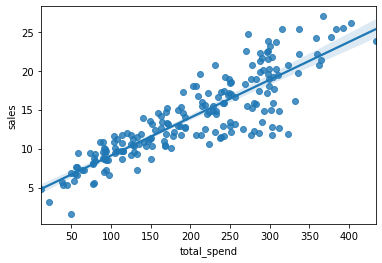

In [4]:
sns.regplot(data=df, x='total_spend', y='sales')
# 

In [5]:
X = df['total_spend']
y = df['sales']

In [6]:
coefficients = np.polyfit(X,y,deg=1)
coefficients # B1, B0

array([0.04868788, 4.24302822])

In [7]:
potential_spend = np.linspace(0,500,100)

In [8]:
predicted_sales = coefficients[0]*potential_spend + coefficients[1]

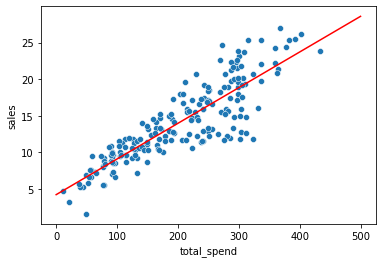

In [9]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color='red')

In [10]:
spend = 200

predicted_sale = coefficients[0]*spend + coefficients[1]
predicted_sale

13.98060407984596

In [11]:
coeffs = np.polyfit(X,y,deg=3)
coeffs

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [12]:
# Above solves y = B3*x^3 + B2*x^2 + B1*x + B0
# Some coeffs are so close to 0
pot_spend = np.linspace(0,500,100)
pred_sales = coeffs[0]*pot_spend**3 + coeffs[1]*pot_spend**2 + coeffs[2]*pot_spend + coeffs[3]

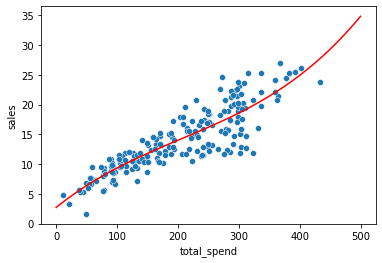

In [13]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(pot_spend, pred_sales, color='red')

# Scikit-Learn Train Test Split

In [14]:
df = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv")
df.head() # Money spent in thousands on a certani form of advertising every week and corresponding sales

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

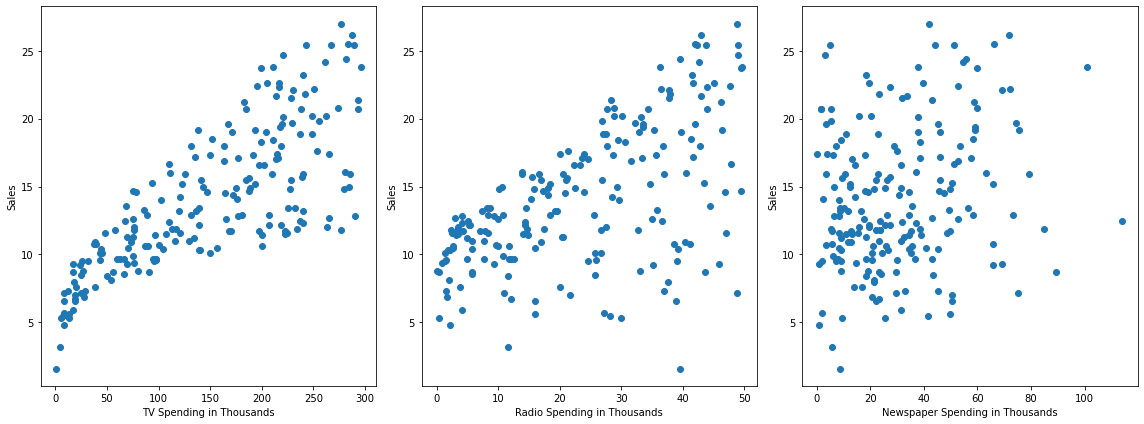

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].scatter(df['TV'],df['sales'])
axes[0].set_xlabel('TV Spending in Thousands')
axes[0].set_ylabel('Sales')

axes[1].scatter(df['radio'],df['sales'])
axes[1].set_xlabel('Radio Spending in Thousands')
axes[1].set_ylabel('Sales')

axes[2].scatter(df['newspaper'],df['sales'])
axes[2].set_xlabel('Newspaper Spending in Thousands')
axes[2].set_ylabel('Sales')

plt.tight_layout()

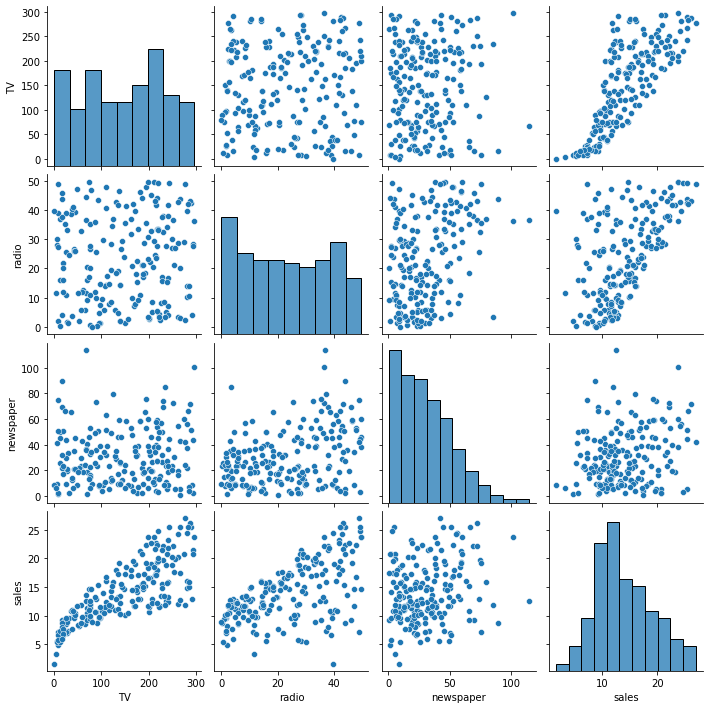

In [16]:
sns.pairplot(data=df)

In [17]:
X = df.drop('sales', axis=1)
y = df['sales']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
X_train

TV  radio  newspaper
85   193.2   18.4       65.7
183  287.6   43.0       71.8
127   80.2    0.0        9.2
53   182.6   46.2       58.7
100  222.4    4.3       49.8
..     ...    ...        ...
63   102.7   29.6        8.4
70   199.1   30.6       38.7
81   239.8    4.1       36.9
11   214.7   24.0        4.0
95   163.3   31.6       52.9

[140 rows x 3 columns]

In [21]:
len(X_test)

60

In [22]:
from sklearn.linear_model import LinearRegression
# help(LinearRegression)

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
test_predictions = model.predict(X_test) # Test against y_test
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

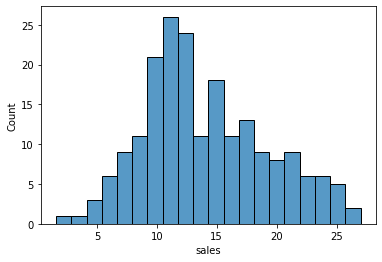

In [28]:
sns.histplot(data=df, x='sales', bins=20)

In [29]:
mean_absolute_error(y_test, test_predictions)

1.2137457736144808

In [30]:
mse = mean_squared_error(y_test, test_predictions)
mse

2.2987166978863782

In [31]:
# RMSE
np.sqrt(mse)

1.516151937599388

# Residual Plots

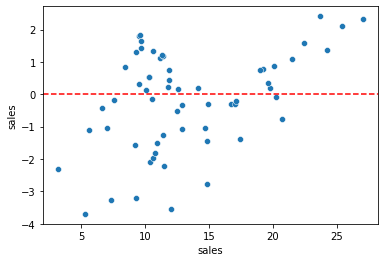

In [34]:
# Plot out residuals.
test_residuals = y_test - test_predictions
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

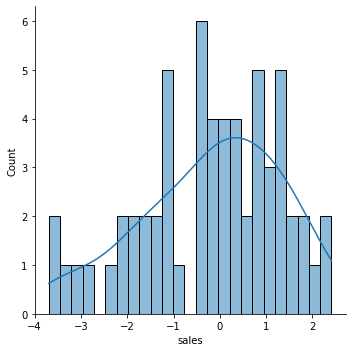

In [35]:
sns.displot(test_residuals, bins=25, kde=True)

# Model Deployment and Coefficient Interpretation

In [36]:
final_model = LinearRegression() # Same model w/ params for your previously built model.
final_model.fit(X,y) # Take full advantage of the full dataset

LinearRegression()

In [37]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [38]:
y_hat = final_model.predict(X)

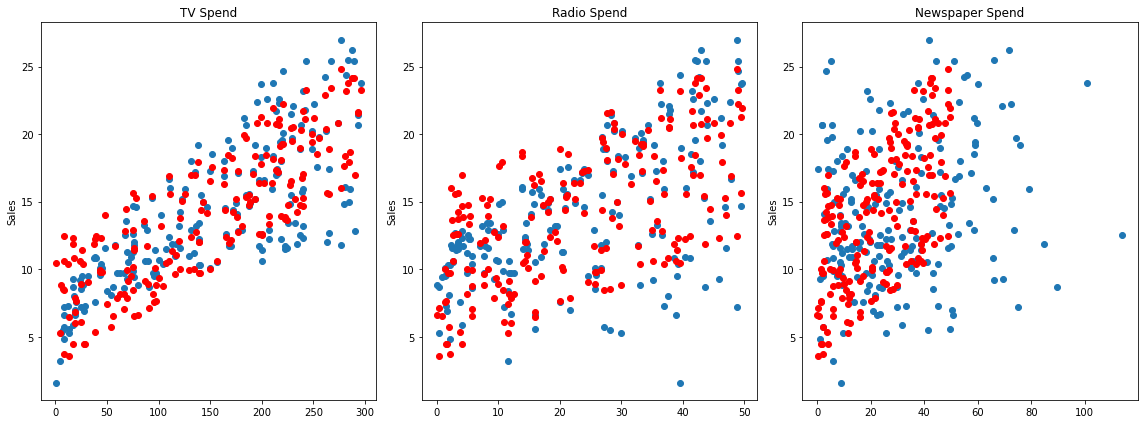

In [39]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [40]:
from joblib import dump,load

In [41]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [42]:
loaded_model = load('final_sales_model.joblib')

In [43]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [44]:
X.shape

(200, 3)

In [45]:
# 149 TV, 22 radio, 12 newspaper
# Sales?
campaign = [[149,22,12]]
loaded_model.predict(campaign) # Predicated sales

array([13.893032])